<Body>   
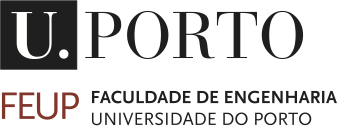   
<h1> <b>Machine Learning 2022/2023 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Daniel Costa** (danielgcosta@fe.up.pt),
**Rui Gonçalves** (rjpg@fe.up.pt)

FEUP, Feb. 2023

---


# **Project #02**

**Note:** This work is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform.
To generate the pdf file we have first to covert the notebook to html using the command `!jupyter nbconvert --to html "ML_project2.ipynb"`, then open the html file and printout to PDF.

**Deadlines:** Present you work (and answer questions) on the week of **May 22** in your corresponding practical class. Upload the files until 23:59 of **June 2, 2023**.


---



# **Identification**

* **Group:** ProjectA05C
* **Name:** Carlos Thadeu Aguiar de Faria
* **Student Number:** 202202472

**Initial setup:** To download the data files, run the next cell.

In [1]:
!wget -O data-setMLproject2.zip https://www.dropbox.com/s/hnyhgqlj5lcqyqr/data-setMLproject2.zip?dl=0 --quiet
!unzip data-setMLproject2.zip -d. 

Archive:  data-setMLproject2.zip
  inflating: ./data_test.csv         
  inflating: ./__MACOSX/._data_test.csv  
  inflating: ./data_test2obs.csv     
  inflating: ./__MACOSX/._data_test2obs.csv  
  inflating: ./data_train.csv        
  inflating: ./__MACOSX/._data_train.csv  


# **Main goal**

Consider the following scenario: A mobile robot aims to build a map of the environment with **semantics**, meaning that the robot should be capable to classify the objects nearby. The robot is travelling around and carries on-board a 2D LIDAR measurement device that obtains range measurements at each sample time $t=0, 0.1, 0.2, \ldots$ The following cell shows an example of the type of data:


In [1]:
import pandas as pd
df_test2obs = pd.read_csv('data_test2obs.csv', index_col=0)
df_test2obs.head(5)
#df

# By convention, zero values mean no range measurements.
# The units are:
# [m] for px and py (position of the robot)
# [m] for the LIDAR ranges

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
0,-4.00,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.98,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-3.96,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-3.94,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.92,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Note that the LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is, 
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. If there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. Moreover, with a small probability, the range measurements could be corrupted with *outliers*.

The next figure shows $r_t$ as a function of the angle $\beta$ taken at time $t=1.0\,s$.


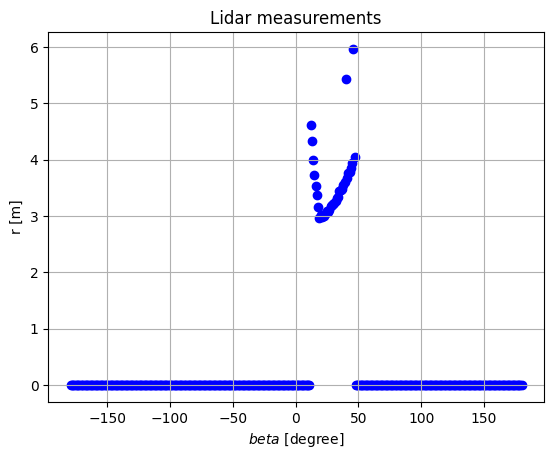

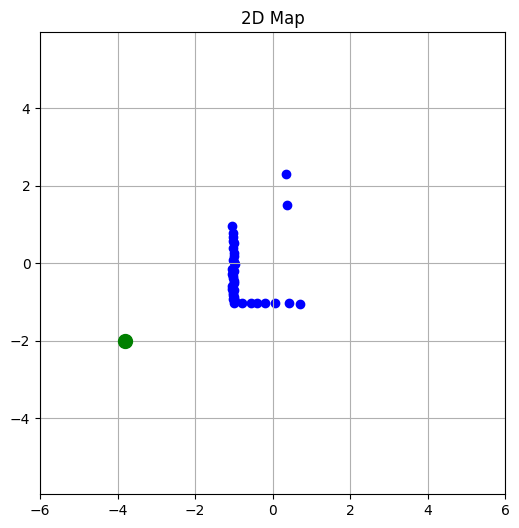

In [2]:
import numpy as np
from numpy import * 
import matplotlib.pyplot as plt

Lidar_range = df_test2obs.iloc[:, np.arange(2,362,1)].values
px = df_test2obs["px"].values
py = df_test2obs["py"].values

t=1*10 #1sec times number of samples/second
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();
plt.show()

#Build the cloud points in 2D plan
x_o, y_o = [], []
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
xdim, ydim = 5, 5
plt.xlim(-xdim-1,xdim+1)
plt.ylim(-ydim-1,ydim+1)
plt.plot(px[t], py[t], 'g.', ms=20)  #position of the robot
plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map');
plt.show()

Note that it may be possible to have more than one object in the range of the LIDAR. \\
Here goes an example when $t=32\,s$:


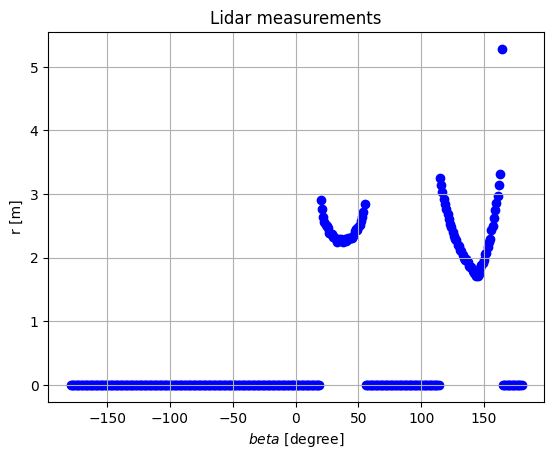

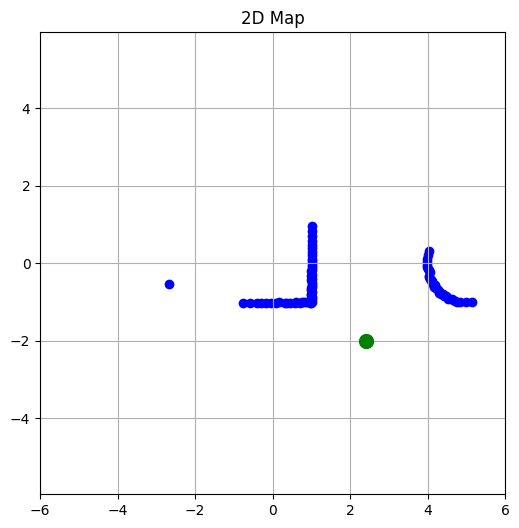

In [3]:
t=32*10 #5sec times number of samples/second
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();
plt.show()

#Build the cloud points in 2D plan
x_o, y_o = [], []
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
xdim, ydim = 5, 5
plt.xlim(-xdim-1,xdim+1)
plt.ylim(-ydim-1,ydim+1)
plt.plot(px[t], py[t], 'g.', ms=20)  #position of the robot
plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map');
plt.show()

# **Part 1: Classification of one object**

At this point, the goal is to classify only one object that could be a square or a circle at each LIDAR snapshot. To this end, it was performed a set of 4 experiments for each obstacle (alone) where in each experiment the robot travelled during $40\,s$ with a constant speed and constant direction (horizontal line segment from left to right) from the initial position $(p_x, p_y) = (-4, \bar y)$ to the final position $(p_x, p_y) = (4, \bar y)$, where $\bar y = -4, -3, -2, -1\, m$ \\
The obstacle (circle and square) were placed at the center of the origin $(0,0)$. \\
All the experiments were combined in a unique dataset and then randomly split into two datasets: the trainning data set (70%) and the testing data set (30%). The content of each data set are displayed next.

Note that there is an extra column (the label column) that indicates if the obstacle is a **circle (label 1)** or a **square (label 2)**.

**1.1**
Implement a **$k$-nearest neighbor ($k$-NN)** classifier that receives the parameter $k$, the sample to classify (that are the range measurements at one snapshot), and a set of labeled training data. \\
Do not use sklearn or similar packages (use the results of notebook #7).

In [ ]:
# Import used packages
import numpy as np
import pandas as pd

In [16]:
# Euclidean distance and k-NN classifier functions
def EuclideanDistance(test, train):
    x = len(test[0])
    train_length = len(train)
    distances = []
    for j in range(train_length):
        obs = len(train[j][0])
        distance = 0
        for i in range(x):
            for o in range(obs):
                distance += np.sqrt((test[0][i] - train[j][0][o]) ** 2 + (test[1][i] - train[j][1][o]) ** 2)
        distances.append(distance)
    return distances

def KNNclassifier(k, x, data, classes):
    dist = EuclideanDistance(x, data)
    ind = np.argsort(np.array(dist), axis=0)
    classes_sorted = classes[ind]
    c1 = 0
    c2 = 0
    for i in range(k):
        if classes_sorted[i] == 1:
            c1 += 1
        else:
            c2 += 1
    if c2 > c1:
        return 2
    else:
        return 1

**1.2**
Test the $k$-NN classifier for the `data_train.csv` set and for the `data_test.csv` set and obtain the respectively accuracy for $k=1,3,5,7,9$ \\
Note that accuracy is defined as 
$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

where TP are the true positives, TN true negatives, FP false positives, and FN the fale negatives. 


In [86]:
# Create list of all cloud points in 2D plan from test and train datasets
df_train = pd.read_csv('data_train.csv', index_col=0)
df_test = pd.read_csv('data_test.csv', index_col=0)

lidar_range_train = df_train.values[:, 2:362]
px_train = df_train["px"].values
py_train = df_train["py"].values
t_range_train = range(len(df_train))
angle = np.linspace(-179, 180, num=360)
x_y_train = []
for t in t_range_train:
    x_train, y_train = [], []
    for i in range(0, lidar_range_train.shape[1]):
        if lidar_range_train[t][i] > 0:
            x_train.append(px_train[t]+lidar_range_train[t][i]*np.cos(angle[i]/180*np.pi))
            y_train.append(py_train[t]+lidar_range_train[t][i]*np.sin(angle[i]/180*np.pi))
    x_y_train.append([x_train, y_train])

lidar_range_test = df_test.values[:, 2:362]
px_test = df_test["px"].values
py_test = df_test["py"].values
t_range_test = range(len(df_test))
angle = np.linspace(-179, 180, num=360)
x_y_test = []
for t in t_range_test:
    x_test, y_test = [], []
    for i in range(0, lidar_range_test.shape[1]):
        if lidar_range_test[t][i] > 0:
            x_test.append(px_test[t]+lidar_range_test[t][i]*np.cos(angle[i]/180*np.pi))
            y_test.append(py_test[t]+lidar_range_test[t][i]*np.sin(angle[i]/180*np.pi))
    x_y_test.append([x_test, y_test])

In [87]:
# Classify test dataset using train dataset
k_list = [1, 3, 5, 7, 9]
classes_train = df_train.values[:,-1]
classes_test = df_test.values[:, -1]
classifications = np.zeros(shape=(len(x_y_test), len(k_list)))
for k in range(len(k_list)):
    for i in range(len(x_y_test)):
        # classifications.append(KNNclassifier(k, x_y_test[i], x_y_train, classes_train))
        classifications[i, k] = KNNclassifier(k, x_y_test[i], x_y_train, classes_train)
        print("classification ", i, " for k = ", k_list[k], " = ", classifications[i][k])
print(classifications)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# Calculate accuracy of calssification for each k
accuracy = dict()
for k in range(len(k_list)):
    accuracy[k_list[k]] = sum(classifications[:,k] == classes_test)/len(classes_test)

**1.3**
Implement an Artificial Neural Network (ANN) of the type multi-layer perceptron (MLP) with
1. an input layer that receives the first 10 nonzero range measurements (for each snapshot);  
2. one hidden layer with 5 neurons with activation functions of the type ReLU (rectified linear unit);
3. an output layer with 1 neuron with a sigmoid activation function; 

4. a loss function of the type mean square error.

Train the ANN using the `data_train.csv` set. \\
**Do not use** PyTorch, TensorFlow or similar packages (check notebook #8). \\
**Tip:** It is important to shuffle the training data. You may get better results with non constant learning rate. A final loss below 0.05 is good!


In [ ]:
# # To complete

# import numpy as np
# np.random.seed(42)

# N_INPUTS = 10  #Number of inputs

# def mse_loss(y_true, y_pred):
#   return ((y_true - y_pred) ** 2).mean()

# # def sigmoid(x):
# # ...

# # def deriv_sigmoid(x):
# # ...

# # # ReLu activation function: 
# # def relu(x):
# # ...

# # # Derivative of ReLu
# # def deriv_relu(x):
# # ...

# class NeuralNetwork:
#   '''
#   Structure of the neural network:
#     - N_INPUTS inputs
#     - a hidden layer with 5 neurons (h1, h2, h3, h4, h5)
#     - an output layer with 1 neuron (o1)
#   '''
#   def __init__(self):
#     # Biases
#     # self.b1 = ...
#     # ...
#     # self.bo = np.random.random()

#     # # Weights
#     # self.w1o, self.w2o, self.w3o, self.w4o, self.w5o = np.random.random(5)
#     # self.wi1 = np.random.random(N_INPUTS)
#     # ...


#   def feedforward(self, x):
#     '''
#     - x is a numpy array with N_INPUTS elements.
#     '''
#     # # Hidden layer
#     # self.sum_h1 = np.dot(self.wi1, x) + self.b1
#     # ...
#     # self.h1 = relu(self.sum_h1)
#     # ...
 
#     # # Output layer
#     # self.sum_o1 = self.w1o*self.h1 + self.w2o*self.h2 + self.w3o*self.h3 + self.w4o*self.h4 + self.w5o*self.h5 + self.bo
#     # self.o1 = sigmoid(self.sum_o1)
#     # return self.o1

  
#   def train(self, data, y_trues, learn_rate = 0.1, epochs = 500):
#     '''
#     - data is a (n x N_INPUTS) numpy array, n = # of samples in the dataset.
#     - y_trues is a numpy array with n elements.
#       Elements in y_true correspond to those in data.
#     '''
#     loss_prev = 10000  #loss_prev is the loss of the previous iteration
#     for epoch in range(epochs):
#       for x, y_true in zip(data, y_trues):

#         # *************************************************
#         # 1. Feedforward Step
#         y_pred = self.feedforward(x)

#         # *************************************************
#         # 2. Backpropagation Step

#         # Partial derivatives.
#         d_L_d_ypred = -2 * (y_true - y_pred)

#         # Output Layer:  Neuron o1
#         # d_ypred_d_w1o = self.h1 * deriv_sigmoid(self.sum_o1)
#         # ...
#         # d_ypred_d_bo = deriv_sigmoid(self.sum_o1)

#         # d_ypred_d_h1 = self.w1o * deriv_sigmoid(self.sum_o1)
#         # ...

#         # Hidden Layer: Neuron h1
#         # d_h1_d_wi1 = ...
#         # d_h1_d_b1 = ...

#         # Hidden Layer: Neuron h1
#         # d_h2_d_wi2 = ...
#         # d_h2_d_b2 = ...

#         # Hidden Layer: Neuron h3

#         # Hidden Layer: Neuron h4

#         # Hidden Layer: Neuron h5

#         # *************************************************
#         # 3. Gradient Descent
#         # Output Layer:  Neuron o1
#         # self.w1o -= learn_rate * d_L_d_ypred * d_ypred_d_w1o
#         # ...
#         # self.bo -= learn_rate * d_L_d_ypred * d_ypred_d_bo

#         # Hidden Layer: Neuron h1
#         # self.wi1 -= ...
#         # self.b1 -= ...

#         # Hidden Layer: Neuron h2
#         # self.wi2 -= ...
#         # self.b2 -= ...

#         # Hidden Layer: Neuron h3

#         # Hidden Layer: Neuron h4

#         # Hidden Layer: Neuron h5

#       # *************************************************
#       # 4. Performance assessment (per epoch)
#       if epoch % 5 == 0:
#         y_preds = np.apply_along_axis(self.feedforward, 1, data)
#         loss = mse_loss(y_trues, y_preds)
#         print("Epoch %d  --> Loss: %.4f" % (epoch, loss))
# # Uncomment this part to enable a nonconstant learning rate 
# #         if loss > loss_prev:  #if loss did not decrease, let's decrease the learn_rate
# #           if learn_rate > 0.002:
# #             learn_rate = learn_rate*.9  #decrease 90% of the previous value
# #           print("I'm at epoch", epoch, "with new learn_rate: ", learn_rate)
# #         loss_prev = loss



# # Create the ANN
# model = NeuralNetwork()

# # # Build the Trainingset (with the first nonzero N_INPUTS ranges)
# # trainingset_X = np.zeros([len(Y_train), N_INPUTS])
# # for t in range(len(Y_train)):
# #   j=0
# #   for i in range(360):
# #     if X_train[t][i] > 0:
# #       if j < N_INPUTS:
# #         trainingset_X[t][j] = X_train[t][i]
# #         j +=1

# # # Trainingset: here the labels are 0 or 1
# # trainingset_Y = Y_train-1

# # #Shuffling the set...
# # from sklearn.utils import shuffle
# # trainingset_X, trainingset_Y = shuffle(trainingset_X, trainingset_Y, random_state=42)

# # # Train the ANN 
# # model.train(trainingset_X, trainingset_Y, learn_rate = 0.1, epochs = 1000)

**1.4**
Test the ANN classifier for the `data_train.csv` set and for the `data_test.csv` set and obtain the respectively accuracy. Write in a brief sentence of the main conclusions about the classifiers (k-NN and ANN) until this point.

In [ ]:
# To complete

# #Evaluation with the Training set
# classification = []
# for t in range(len(Y_train)):
#   classification.append( model.feedforward(...) )
# classification = np.array(classification)
# error_clas = 0
# for t in range(len(classification)):
#   if (classification[t] >= 0.5) and ...:
# ...
#   if (classification[t] < 0.5) and ...:
# ...
# print("Number of misclassified samples in the training data: ", error_clas, "in", len(Y_test))
# acc = ...
# print(f"Accuracy of the model: {100.0*acc:4.2f}%")


# # Evaluation with Test_set
# test_set_X = np.zeros([len(Y_test), N_INPUTS])
# ...

# **Part 2: Classification of two objects**

We would like now to use the previous ANN classifier to the data in `data_test2obs.csv` that may have two objects at the same snapshot. The idea is to before send the range measurements to the classifier, apply first a k-means at each snapshot to separate the data into two sub-sets such that each sub-set only contains data of one object. Then, send each subset of data to the ANN classifier.

**2.1**
Implement the k-means algorithm and test it for two snapshots **converted to the 2D map** (that is, the input data for the k-means is the 2D map) of the dataset `data_test2obs.csv` for 
1. $t=1\,s$ (which has only one object) and 
2. for $t=32\,s$ (which has 2 objects). 

What can you conclude? \\
Do not use sklearn or similar packages (use the results of notebook #10).


In [ ]:
# To complete

# def kmeans_func(X_func, K_func, show_plot=0, ini_method=0):
#   '''
#     X_func are sample points; 
#     K_func is the number of clusters;
#     showplot 0/1 - not / show centroid evolution over iterations;
#     ini_method 0/1 - ini centroids 0=> with random within data bounderies or 1=>from the initial points (risky!)
#   '''
#   cluster = np.zeros(X_func.shape[0],dtype=int)
#   centr_ini = []
#   if ini_method:  # 1 is points, 0 is random
#     # Initial centroids are sample points (risky!)
#     for i in range(K_func):
#       centr_ini.append(X_func[i])
#   else:
#     # Non absurd Random Initial Centroids
#     max0 = max(X_func[:,0]);
#     min0 = min(X_func[:,0]);
#     max1 = max(X_func[:,1]);
#     min1 = min(X_func[:,1]);

#     for i in range(K_func):
#       centr_ini.append([random.uniform(min0,max0),random.uniform(min1,max1)])

#   iter = 0
#   diff = 1
#   centroids = centr_ini
#   centr_list = [centroids]

# # ...
#   return centroids, cluster


# #Build the cloud points in 2D map
# x_o, y_o = [], []

# t=1*10 
# for i in range(len(Lidar_range[t])):
#   if Lidar_range[t][i] > 0:
#     x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
#     y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

# X = np.array([x_o, y_o]).T
# centr, clust = kmeans_func(X, 2, show_plot=1, ini_method=0)
# print(clust)
# ...

**2.2**
Using the previous results, 
1. implement a method to automatically identify for each snapshot if it has 1 or 2 objects;
2. build a new test set with all the data in `data_test2obs.csv`, but now the new test set only has 1 object in each snapshot (and therefore this data set has more lines);
3. test this new data set using the ANN classifier.

Plot the position of the robot and the classified objects for some snapshots. What are the main conclusions?

In [ ]:
# # To complete

# Threshold = ...  # to decide if k=1 or k=2,

# Lidar_range = df_test2obs.iloc[:, np.arange(2,362,1)].values
# px = df_test2obs["px"].values
# py = df_test2obs["py"].values

# def SSE(X, centroids, cluster): 
#   '''
#     returns the Sum of Squared Error
#     X are the 2D points
#     centroids are the cluster centers
#     cluster is the cluster that each data point belongs to
#   '''
#   sum = 0
#   for i, val in enumerate(X):
#     sum += np.sqrt((centroids[cluster[i], 0]-val[0])**2 +(centroids[cluster[i], 1]-val[1])**2)  ####
#   return sum

# # Building the data set for ANN testing using k-means to split objects 

# test_set_X = np.array([])
# ...

#   X = np.array([x_o, y_o]).T
#   cost_list = []
#   k_range = range(1, 3)
#   for k in k_range:
#     centr, clust = kmeans_func(X, k, show_plot=0, ini_method=0) 
#     # Calculate SSE
#     cost = SSE(X, centr, clust)
#     cost_list.append(cost)
#   #Let's now decide if this snapshot has 1 or 2 obstacles
#   if ...
#     #2 objects
#     X_feature1, X_feature2 = np.zeros([N_INPUTS]), np.zeros([N_INPUTS])
#     j1,j2=0,0
#     for i in range(len(x_o)):
#       if j1 < N_INPUTS:
#         if clust[i] == 0:
#           X_feature1[j1]=np.sqrt((x_o[i]-px[t])**2 + (y_o[i]-py[t])**2)
#           j1=j1+1
#       if j2 < N_INPUTS:
#         if clust[i] == 1:
#           X_feature2[j2]=np.sqrt((x_o[i]-px[t])**2 + (y_o[i]-py[t])**2)
#           j2=j2+1
#     if len(test_set_X) == 0:
#       test_set_X = np.array([X_feature1, X_feature2])
#     else:
#       test_set_X = np.concatenate((test_set_X,np.array([X_feature1, X_feature2])))
#   else: #only one object
#     X_feature1 = np.zeros([N_INPUTS])
#     j1=0
#     for i in range(len(x_o)):
#       if j1 < N_INPUTS:
#         if clust[i] == 0:
#           X_feature1[j1]=np.sqrt((x_o[i]-px[t])**2 + (y_o[i]-py[t])**2)
#           j1=j1+1
#     if len(test_set_X) == 0:
#       test_set_X = np.array([X_feature1])
#     else:
#       test_set_X = np.concatenate((test_set_X,np.array([X_feature1])))


# ...

**2.3 (Extra)** 
Using now PyTorch or TensorFlow (or other similar package), implement a better ANN (meaning with a better accuracy) and test it.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

In [ ]:
# To complete